# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

**Note to Self:**

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. If there are $n$ observations with $p$ variables, then the number of distinct principal components is $min(n − 1, p)$.

From Wikipedia

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
# Class created to simply bold or add color to printed text.
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Load feature names.

In [3]:
feature_names = []
# I changed the next line because my Data has a different file path
# with open('../Data/mushroom.map') as fmap:
with open('Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

# I changed the next line because my Data has a different file path
# with open('../Data/mushroom.data') as fdata:
with open('Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

**Note To Self:**

One of the attributes in a PCA model is **explained_variance_ratio_** which gives the **percentage of variance explained by each of the selected components**.

The fraction of the total variance in the training data explained by the first k principal components is:
|  k  | explained variance ratio |cumulative explained variance ratio|
----------------------------------------------------------------------
|  1  |          0.1640          |              0.1640               |
|  2  |          0.1332          |              0.2973               |
|  3  |          0.1017          |              0.3990               |
|  4  |          0.0706          |              0.4696               |
|  5  |          0.0387          |              0.5083               |
|  6  |          0.0368          |              0.5451               |
|  7  |          0.0313          |              0.5764               |
|  8  |          0.0273          |              0.6037               |
|  9  |          0.0262          |              0.6299               |
| 10  |          0.0223          |              0.6522               |
| 11  |          0.0205          |        

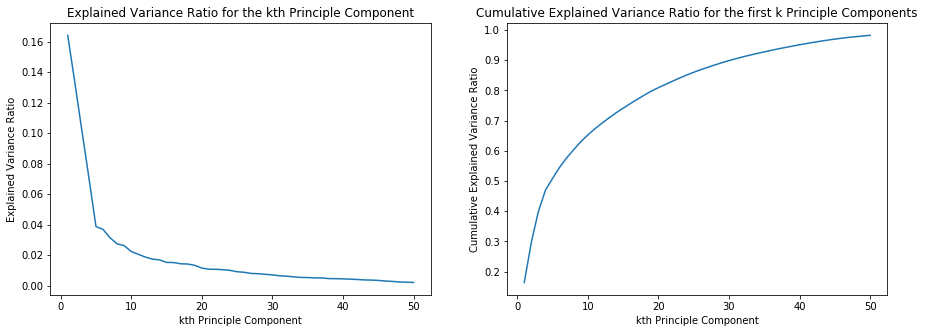

In [5]:
### STUDENT START ###

def P1():
    
    # Fit a PCA model to the train_data
    pca = PCA()
    pcaModel = pca.fit(train_data)

    # Variable to hold summed fractions
    cum_expl_var = []

    print("{}The fraction of the total variance in the training " 
              "data explained by the first k principal components is:{}".format(color.BOLD,color.END))

    # Print out header
    print("|{:^5}|{:^26}|{:^35}|".format("k","explained variance ratio","cumulative explained variance ratio"))
    print("-"*70)

    # Print out the 50 explained_variance_ratio_ and cumulative explained_variance_ratio_ for each k value
    for k in range(1,51):
        if k == 1:
            cum_expl_var.append(pcaModel.explained_variance_ratio_[0])
        else:
            cum_expl_var.append(cum_expl_var[k-2] + pcaModel.explained_variance_ratio_[k-1])
        print("|{:^5}|{:^26.4f}|{:^35.4f}|".format(k,pcaModel.explained_variance_ratio_[k-1],cum_expl_var[k-1]))

    # Plot this data
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1,51),pcaModel.explained_variance_ratio_[0:50])
    plt.title("Explained Variance Ratio for the kth Principle Component")
    plt.xlabel("kth Principle Component")
    plt.ylabel("Explained Variance Ratio")
    plt.subplot(1, 2, 2)
    plt.plot(range(1,51),cum_expl_var)
    plt.title("Cumulative Explained Variance Ratio for the first k Principle Components")
    plt.xlabel("kth Principle Component")
    plt.ylabel("Cumulative Explained Variance Ratio")

P1()
### STUDENT END ###

**Answer:** As the printed table shown above shows, the first principle component explains the highest fraction of variance in the training data (0.1640). Each subsequent principle component explains less and less of the variance in the training data. From the cumulative explained variance ratio, we see that the first five principle components explain 50% of the variance in the training data. The first 50 principle components combine to explain 98.21% of the varaince in the training data.

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

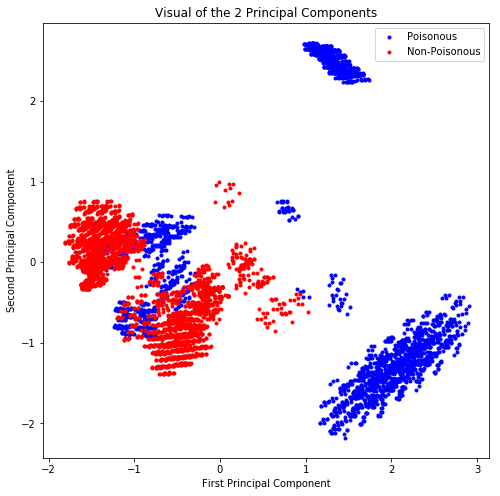

In [6]:
### STUDENT START ###

def P2():
    
    # Create a PCA with 2 components
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(train_data)

    # Plot the 2 principal components show the poisonous cases in blue and the non-poisonous components in red
    fig = plt.figure(figsize=(8,8))
    x = principalComponents[:,0]
    y = principalComponents[:,1]
    plt.scatter(x[train_labels==1],y[train_labels==1], c="b", label = "Poisonous", marker=".")
    plt.scatter(x[train_labels==0],y[train_labels==0], c="r", label = "Non-Poisonous", marker=".")
    plt.legend()
    plt.title("Visual of the 2 Principal Components")
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")

P2()

### STUDENT END ###

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

**Note To Self:**

Kmeans.fit_transform(principalComponents) transforms each observation to a cluster-distance space

Kmeans.cluster_centers_ gives you the coordinates of each of the centers of the clusters

Kmeans.labels_ gives the labels of each of the points

k = 1


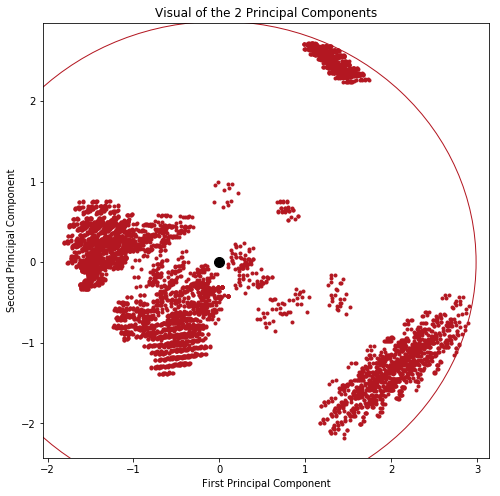

k = 2


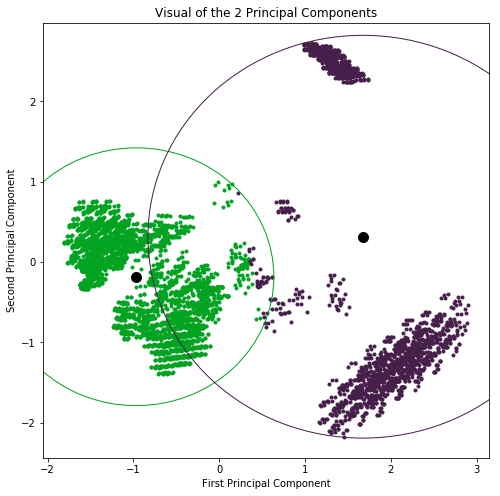

k = 3


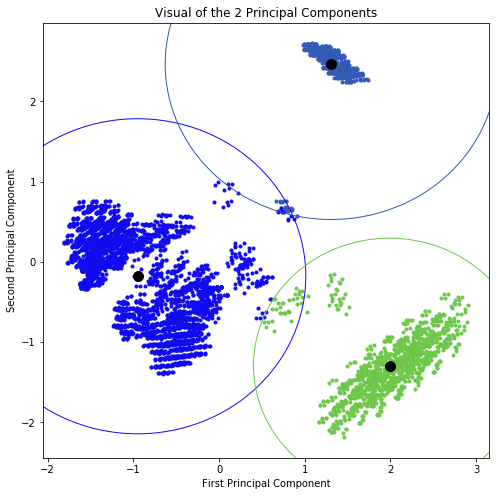

k = 4


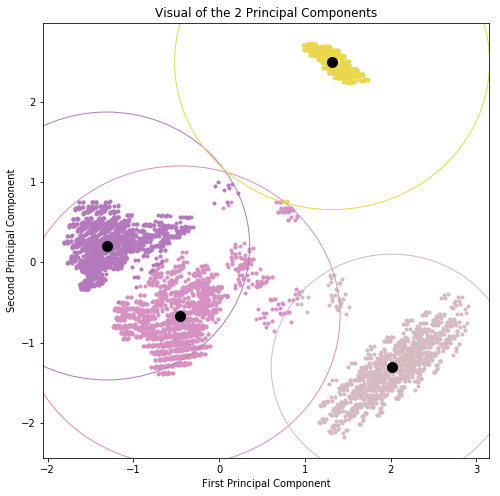

k = 5


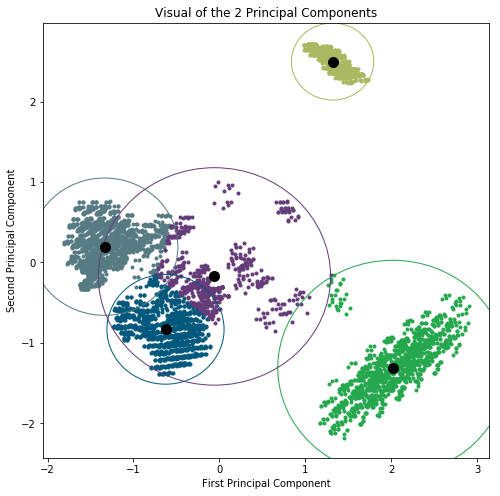

k = 6


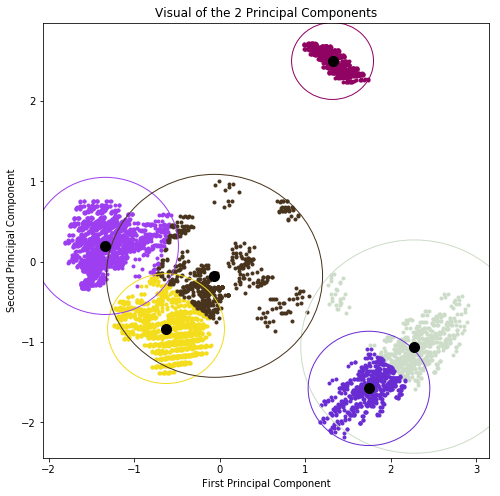

k = 7


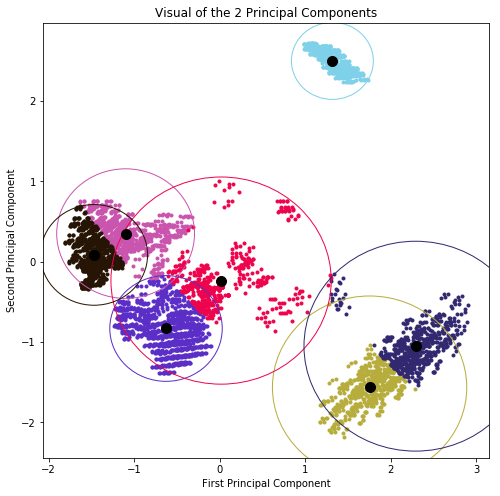

k = 8


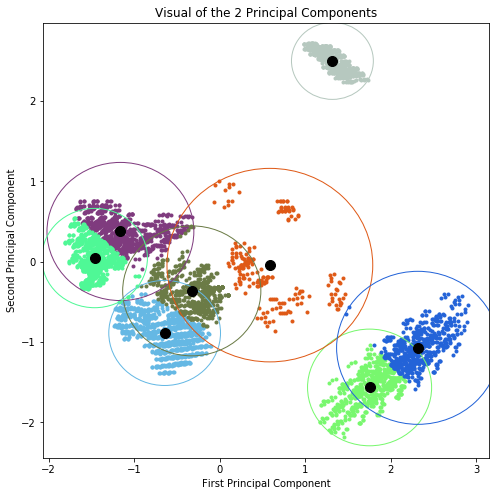

k = 9


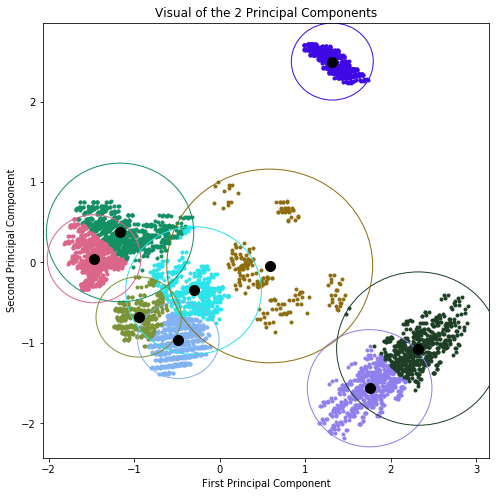

k = 10


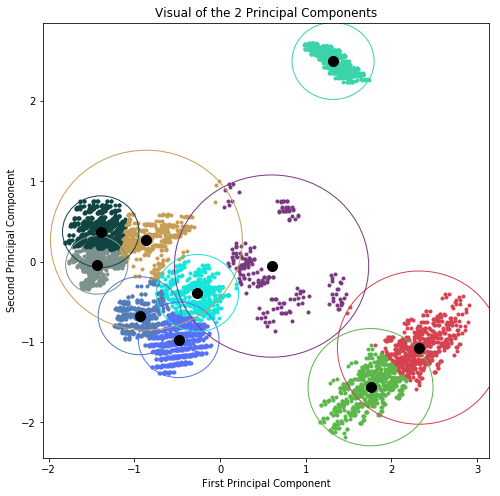

k = 11


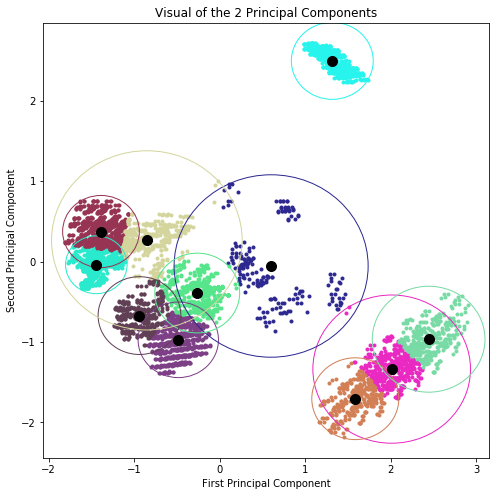

k = 12


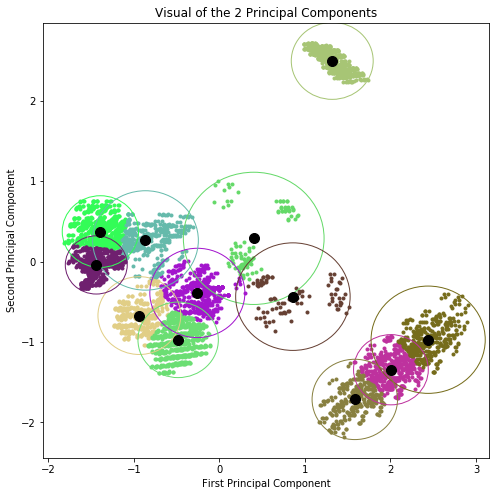

k = 13


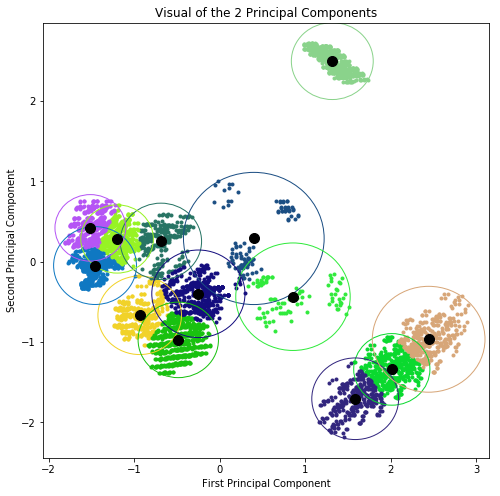

k = 14


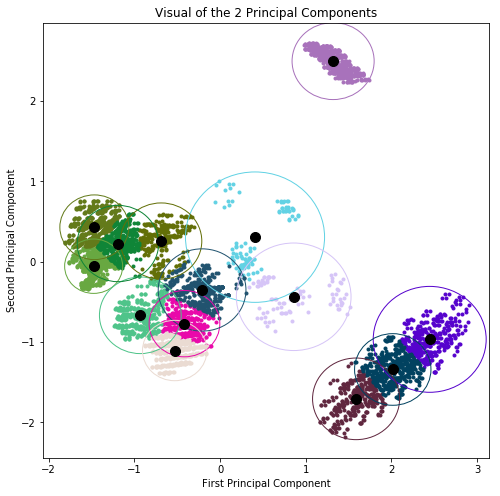

k = 15


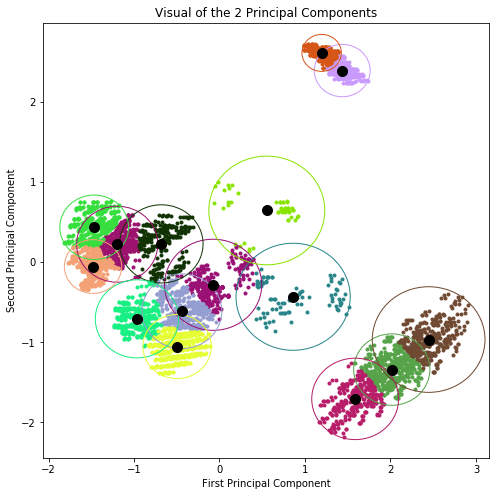

k = 16


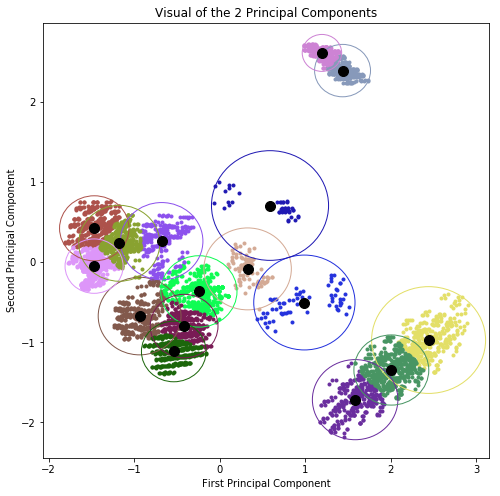

In [7]:
### STUDENT START ###

def P3():
    # Create a PCA with 2 components
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(train_data)

    # Run KMeans with 1 to 16 clusters over the 2d projected data
    for k in range(1,17):
        print("{}k = {}{}".format(color.BOLD,k,color.END))
        kmeans = KMeans(n_clusters=k)
        distances = kmeans.fit_transform(principalComponents)

        # Plot a new figure for each 
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        plt.title("Visual of the 2 Principal Components")
        plt.xlabel("First Principal Component")
        plt.ylabel("Second Principal Component")
        # Store the x and y coordinates for each point we are going to plot
        x = principalComponents[:,0]
        y = principalComponents[:,1]
        # Iterate through each of the clusters to plot their points, center, and circle
        for i in range(kmeans.cluster_centers_.shape[0]):
            # Get a random color to plot by
            c = np.random.rand(3,1).flatten().tolist()
            # Plot the points of each cluster
            plt.scatter(x[kmeans.labels_ == i],y[kmeans.labels_ == i],marker=".",c=c)
            # Plot the center of each cluster
            plt.plot(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],"ko", markersize = 10)
            # Plot the circle for each cluster
            max_dist = np.amax(distances[kmeans.labels_ == i][:,i])
            cir = plt.Circle(kmeans.cluster_centers_[i],max_dist,fill = False, edgecolor = c)
            ax.add_artist(cir)
        plt.show()
P3()

### STUDENT END ###

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

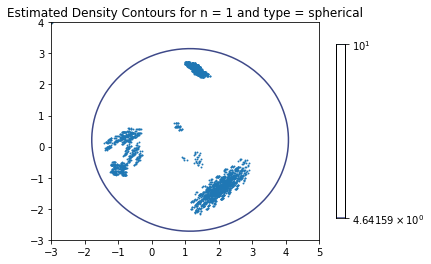

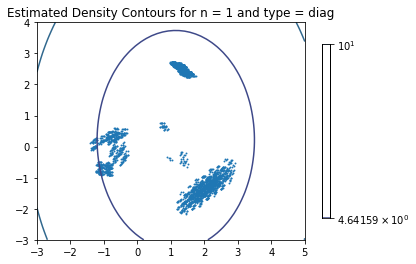

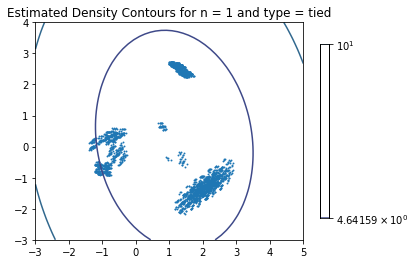

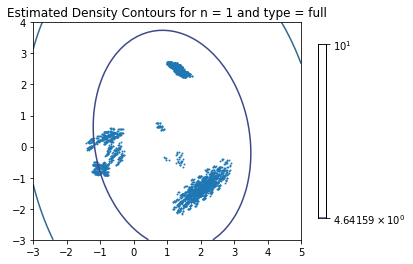

/Users/adamyang/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


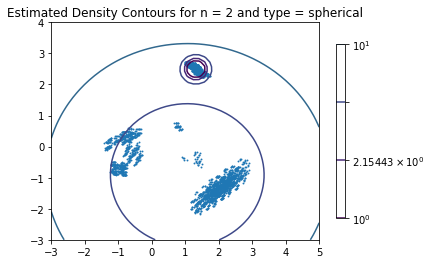

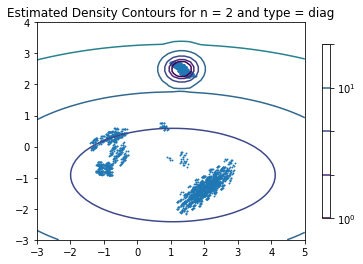

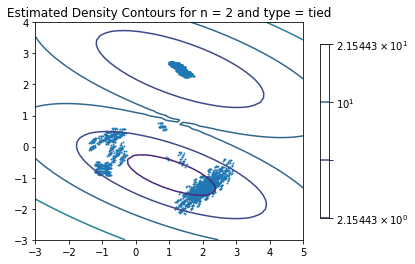

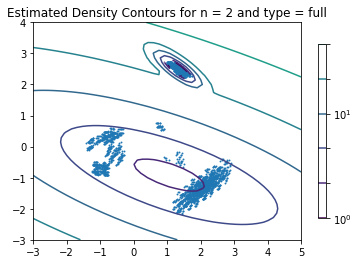

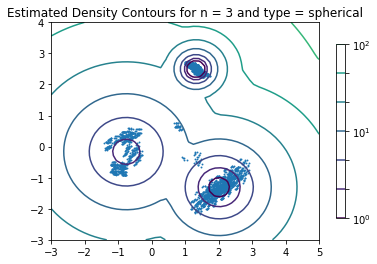

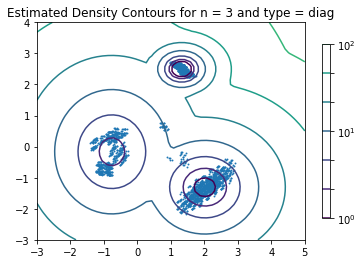

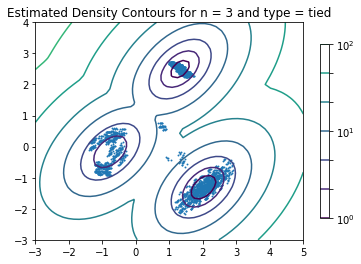

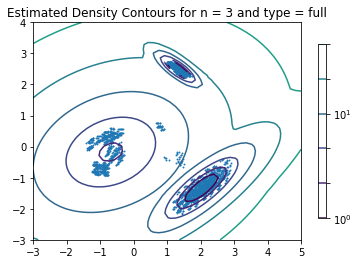

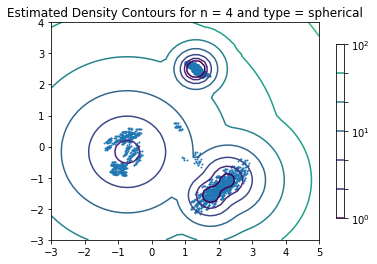

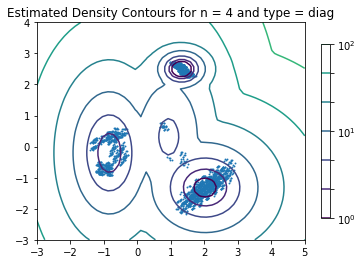

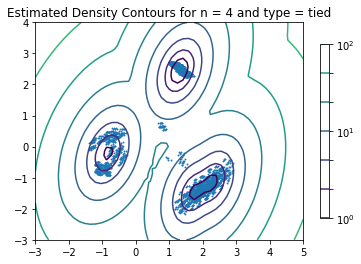

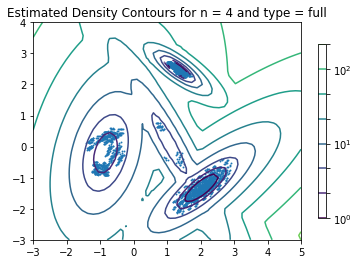

In [8]:
### STUDENT START ###

def P4():
    # Create a PCA with 2 components and only look at the positive examples
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(train_data)
    positivePC = principalComponents[train_labels == 1]

    num_mixtures = [1,2,3,4]
    matrix_type = ["spherical","diag","tied","full"]

    for i in num_mixtures:
        for j in range(4):
            gmm = GaussianMixture(n_components = i, covariance_type = matrix_type[j])
            gmm.fit(positivePC)

            # display predicted scores by the model as a contour plot
            x = np.linspace(-3., 5.)
            y = np.linspace(-3., 4.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')

            plt.scatter(positivePC[:, 0], positivePC[:, 1], .8)

            plt.title("Estimated Density Contours for n = {} and type = {}".format(i,matrix_type[j]))
            plt.axis("tight")
            plt.show()

P4()

### STUDENT END ###

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [9]:
### STUDENT START ###

def P5():

    # Create a PCA with 2 components. Have one set for positive examples and one set for negative examples
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(train_data)
    positivePC = principalComponents[train_labels == 1]
    negativePC = principalComponents[train_labels == 0]

    # Transform the test data to 2 compoents as well.
    testpca = pca.transform(test_data)

    # Fit a 4-component full covariance GMM for positive examples only.
    gmmPos = GaussianMixture(n_components = 4, covariance_type = "full")
    gmmPos.fit(positivePC)
    # Use GaussianMixture.score_samples to get the per-sample average log-likelihood of the given data X.
    # Note: we are using mixture.GaussianMixture instead of mixture.GMM for this. 
    # That's why we use score_samples instead of score.
    scorePos = gmmPos.score_samples(testpca)

    # Fit a 4-component full covariance GMM for negative examples only.
    gmmNeg = GaussianMixture(n_components = 4, covariance_type = "full")
    gmmNeg.fit(negativePC)
    # Use Gmm.score to get the per-sample average log-likelihood of the given data X
    scoreNeg = gmmNeg.score_samples(testpca)

    # Predict the test examples by choosing the label for which the model gives the larger probability
    # If scorePos > scoreNeg, we assume the mushroom is poisonous and we get True, otherwise, False
    predict = scorePos > scoreNeg

    # Accuracy = Number of correct predictions / total number of labels
    accuracy = np.sum(predict == test_labels)/len(test_labels)

    print("{}The accuracy is {:.4f}{}".format(color.BOLD, accuracy, color.END))

P5()
### STUDENT END ###

The accuracy is 0.9502


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [10]:
### STUDENT START ###

def TestAccuracy(scorePos, scoreNeg):
    # Predict the test examples by choosing the label for which the model gives the larger probability
    # If scorePos > scoreNeg, we assume the mushroom is poisonous and we get True, otherwise, False
    predict = scorePos > scoreNeg
    # Accuracy = Number of correct predictions / total number of labels
    accuracy = np.sum(predict == test_labels)/len(test_labels)
    return(accuracy)

def P6():
    nclasses = 2 # Only two labels, of Positive or Negative
    matrix_type = ["spherical","diag","tied","full"]
    best_accuracy = 0 # Initialize accuracy

    for nPCA in range(1,51):
        for nGMM in range(1,51):
            for covType in matrix_type:
                if covType == "spherical":
                    # In a GMM with a spherical covariance matrix type, each component has its own single variance.
                    # Therefore, the number of covariance components is 1
                    cov_num = 1
                elif covType == "diag":
                    # In a GMM with a diag covariance matrix type, each component has it's own diagonal covariance matrix.
                    # The number of components in just the diagonal of just the covariance matrix is equal to
                    # the number of PCA components
                    cov_num = nPCA
                elif covType == "full":
                    # In a GMM with a full covariance matrix type, each component has it's own general covariance matrix.
                    # The number of components is (full covariance matrix - diagonal)/2 + diagonal to get only
                    # half of the covariance matrix (since it's symmetrical)
                    cov_num = (nPCA**2 - nPCA)/2 + nPCA
                elif covType == "tied":
                    # In a GMM with a tied covariance matrix type, each component has the same general covaraince matrix.
                    # The number of components will the the same as the "full" covariance matrix type, but divided
                    # by the number of GMM components there are
                    cov_num = ((nPCA**2 - nPCA)/2 + nPCA)/nGMM
                parameterSize = (nPCA + cov_num)*nGMM*nclasses
                if parameterSize > 50:
                    pass
                else:
                    # Create a PCA with nPCA components. 
                    # Have one set for positive examples and one set for negative examples
                    pca = PCA(n_components=nPCA)
                    principalComponents = pca.fit_transform(train_data)
                    positivePC = principalComponents[train_labels == 1]
                    negativePC = principalComponents[train_labels == 0]
                    # Transform the test data to 2 compoents as well.
                    testpca = pca.transform(test_data)

                    # Fit a GMM for positive examples only.
                    gmmPos = GaussianMixture(n_components = nGMM, covariance_type = covType)
                    gmmPos.fit(positivePC)
                    # Use GaussianMixture.score_samples to get the per-sample average log-likelihood of the given data X.
                    # Note: we are using mixture.GaussianMixture instead of mixture.GMM for this. 
                    # That's why we use score_samples instead of score.
                    scorePos = gmmPos.score_samples(testpca)

                    # Fit a GMM for negative examples only.
                    gmmNeg = GaussianMixture(n_components= nGMM, covariance_type = covType)
                    gmmNeg.fit(negativePC)
                    # Use Gmm.score to get the per-sample average log-likelihood of the given data X
                    scoreNeg = gmmNeg.score_samples(testpca)

                    # Test the accuracy
                    accuracy = TestAccuracy(scorePos, scoreNeg)

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        print("The current best accuracy is {:.4f} with {} pricipal components, "
                              "{} mixture components, and a {} covariance type"
                              .format(best_accuracy, nPCA, nGMM, covType))
                        best_nPCA = nPCA
                        best_nGMM = nGMM
                        best_covType = covType
    print("{}The overall best accuracy is {:.4f} with {} pricipal components, "
          "{} mixture components, and a {} covariance type{}"
          .format(color.RED, best_accuracy, best_nPCA, best_nGMM, best_covType, color.END))

P6()

### STUDENT END ###

The current best accuracy is 0.8443 with 1 pricipal components, 1 mixture components, and a spherical covariance type
The current best accuracy is 0.8986 with 1 pricipal components, 2 mixture components, and a spherical covariance type
The current best accuracy is 0.9093 with 1 pricipal components, 3 mixture components, and a spherical covariance type
The current best accuracy is 0.9155 with 1 pricipal components, 3 mixture components, and a tied covariance type
The current best accuracy is 0.9164 with 1 pricipal components, 4 mixture components, and a diag covariance type
The current best accuracy is 0.9181 with 1 pricipal components, 4 mixture components, and a tied covariance type
The current best accuracy is 0.9457 with 2 pricipal components, 3 mixture components, and a spherical covariance type
The current best accuracy is 0.9493 with 2 pricipal components, 4 mixture components, and a full covariance type
The current best accuracy is 0.9573 with 2 pricipal components, 5 mixture co